# Tutorial 5: Deep Learning in Pyspark Environment
## NEURAL NETWORKS WITH SCIKIT-LEARN, KERAS AND H2O

This chapter executes and appraises a non-linear neural networks for binary classification using a diverse set of comprehensive Python frameworks (i.e., SciKit-Learn, Keras, and H2O).

In [1]:
# sudo apt install pip
# sudo apt install python3-sklearn
# sudo apt install python3-pandas
# sudo apt install python3-seaborn
# Execute the above commands on Ubuntu terminal

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set_theme("talk","ticks",font_scale=1, font="Calibri")

In [4]:
# Set a common font family
plt.rcParams['font.family'] = 'DejaVu Sans'  # Choose a commonly available font

# Data Preprocessing

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"banking.csv")
drop_column_names = df.columns[[8, 9, 10]]
initial_data = df.drop(drop_column_names, axis="columns")
initial_data.iloc[::, 1] = pd.get_dummies(initial_data.iloc[::, 1])
initial_data.iloc[::, 2] = pd.get_dummies(initial_data.iloc[::, 2])
initial_data.iloc[::, 3] = pd.get_dummies(initial_data.iloc[::, 3])
initial_data.iloc[::, 4] = pd.get_dummies(initial_data.iloc[::, 4])
initial_data.iloc[::, 5] = pd.get_dummies(initial_data.iloc[::, 5])
initial_data.iloc[::, 6] = pd.get_dummies(initial_data.iloc[::, 6])
initial_data.iloc[::, 7] = pd.get_dummies(initial_data.iloc[::, 7])
initial_data.iloc[::, 11] = pd.get_dummies(initial_data.iloc[::, 11])
initial_data = initial_data.dropna()
x = np.array(initial_data.iloc[::,0:17])
y = np.array(initial_data.iloc[::,-1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

# SciKit-Learn in Action

In [6]:
from sklearn.neural_network import MLPClassifier
sk_multilayer_perceptron_net = MLPClassifier()
sk_multilayer_perceptron_net.fit(sk_standard_scaled_x_train, y_train)

MLPClassifier()

In [7]:
from sklearn import metrics
sk_yhat_multilayer_perceptron_net = sk_multilayer_perceptron_net.predict(sk_standard_scaled_x_test)
sk_multilayer_perceptron_net_assessment = pd.DataFrame(metrics.classification_report(y_test, sk_yhat_multilayer_perceptron_net,
                                                                                     output_dict=True)).transpose()
sk_multilayer_perceptron_net_assessment

precision    recall  f1-score      support
0              0.912570  0.983208  0.946573  7325.000000
1              0.644509  0.244250  0.354249   913.000000
accuracy       0.901311  0.901311  0.901311     0.901311
macro avg      0.778539  0.613729  0.650411  8238.000000
weighted avg   0.882861  0.901311  0.880927  8238.000000

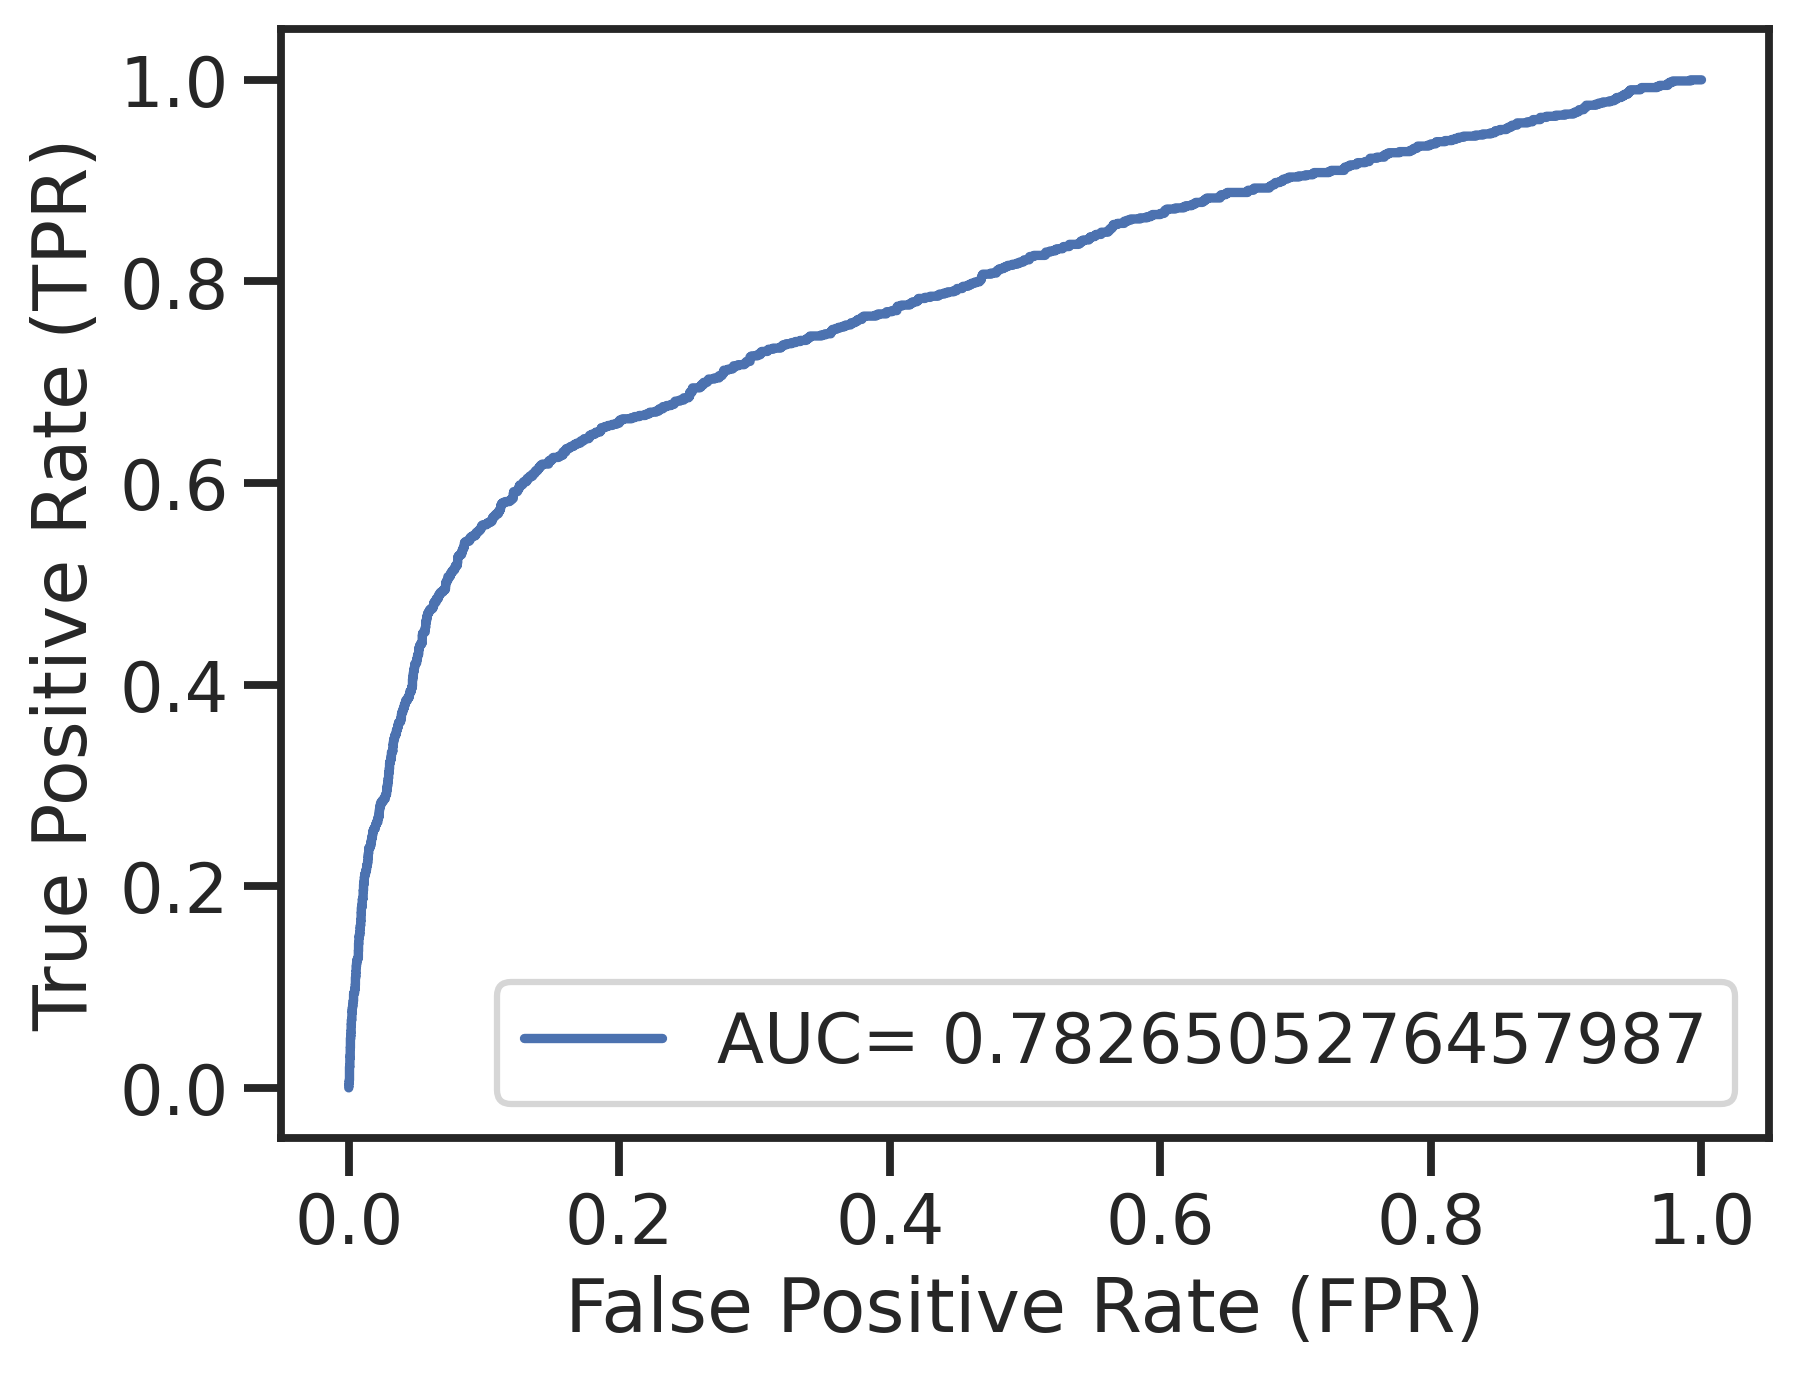

In [8]:
yhat_proba_sk_multilayer_perceptron_net = sk_multilayer_perceptron_net.predict_proba(sk_standard_scaled_x_test)[::,1]
fpr_sk_multilayer_perceptron_net, tprr_sk_multilayer_perceptron_net, _ = metrics.roc_curve(y_test, yhat_proba_sk_multilayer_perceptron_net)
area_under_curve_sk_multilayer_perceptron_net = metrics.roc_auc_score(y_test, yhat_proba_sk_multilayer_perceptron_net)
plt.plot(fpr_sk_multilayer_perceptron_net, tprr_sk_multilayer_perceptron_net, label="AUC= "+ str(area_under_curve_sk_multilayer_perceptron_net))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

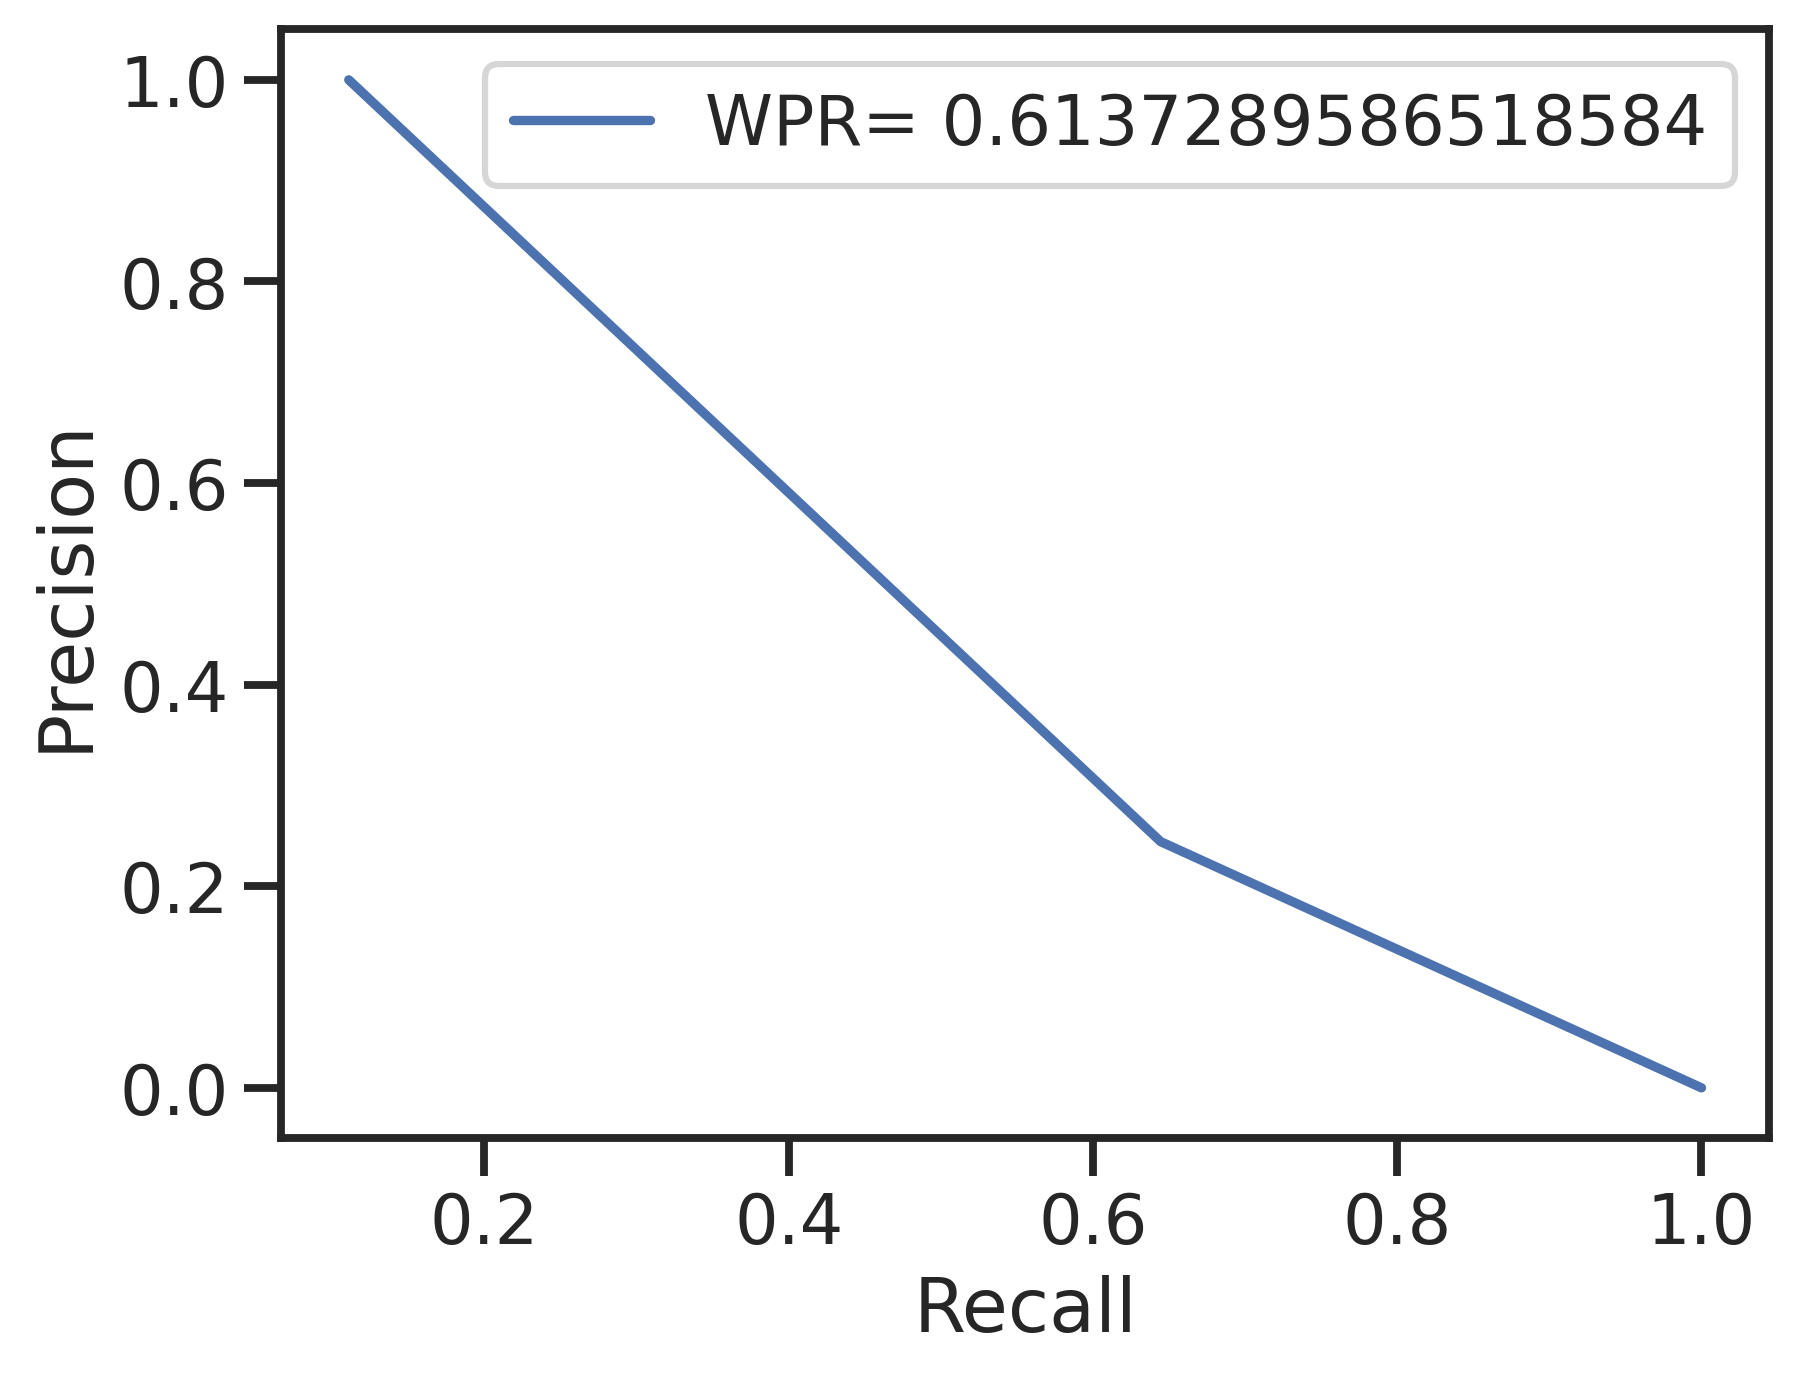

In [9]:
p_sk_multilayer_perceptron_net, r_sk_multilayer_perceptron_net, _ = metrics.precision_recall_curve(y_test, sk_yhat_multilayer_perceptron_net)
weighted_ps_sk_multilayer_perceptron_net = metrics.roc_auc_score(y_test, sk_yhat_multilayer_perceptron_net)
plt.plot(p_sk_multilayer_perceptron_net, r_sk_multilayer_perceptron_net,
         label="WPR= " +str(weighted_ps_sk_multilayer_perceptron_net))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

In [10]:
from sklearn.model_selection import learning_curve
train_port_sk_multilayer_perceptron_net, trainscore_sk_multilayer_perceptron_net, testscore_sk_multilayer_perceptron_net = learning_curve(sk_multilayer_perceptron_net, x, y,
                                                                                                                                        cv=3, n_jobs=-5, train_sizes=np.linspace(0.1,1.0,50))
trainscoresk_multilayer_perceptron_net_mean = np.mean(trainscore_sk_multilayer_perceptron_net, axis=1)
testscoresk_multilayer_perceptron_net_mean = np.mean(testscore_sk_multilayer_perceptron_net, axis=1)
plt.plot(train_port_sk_multilayer_perceptron_net, trainscoresk_multilayer_perceptron_net_mean, label="Weighted training accuracy")
plt.plot(train_port_sk_multilayer_perceptron_net, testscoresk_multilayer_perceptron_net_mean, label="Weighted cv accuracy Score")
plt.xlabel("Training values")
plt.ylabel("Weighted accuracy score")
plt.legend(loc="best")
plt.show()

# Keras in Action

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

In [12]:
sk_standard_scaled_x_train = np.array([np.array(val) for val in sk_standard_scaled_x_train])

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_validate, KFold
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

2024-09-10 23:38:38.078458: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 23:38:38.170229: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 23:38:38.263499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 23:38:38.335888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 23:38:38.360392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 23:38:38.584111: I tensorflow/core/platform/cpu_feature_gu

In [14]:
from tensorflow.keras import regularizers

In [15]:
#import tensorflow as tf
#from tensorflow import keras
#from  tensorflow.keras import regularizers
#from  tensorflow.keras.layers import Dense, Dropout
#from  tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier

In [16]:
def keras_multilayer_perceptron_net(optimizer="adam"):
    keras_multilayer_perceptron_net_model = Sequential()
    keras_multilayer_perceptron_net_model.add(Dense(17, input_dim=17, activation="sigmoid",kernel_regularizer=regularizers.l1(0.001), bias_regularizer=regularizers.l1(0.01)))
    keras_multilayer_perceptron_net_model.add(Dense(17, activation="relu"))
    keras_multilayer_perceptron_net_model.add(Dense(17, activation="relu"))
    keras_multilayer_perceptron_net_model.add(Dense(1, activation="relu"))
    keras_multilayer_perceptron_net_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return keras_multilayer_perceptron_net_model

In [17]:
keras_multilayer_perceptron_net_model = KerasClassifier(build_fn=keras_multilayer_perceptron_net)

In [18]:
keras_multilayer_perceptron_net_model_history = keras_multilayer_perceptron_net_model.fit(sk_standard_scaled_x_train, y_train, batch_size=14, epochs=56)
keras_multilayer_perceptron_net_model_history

Epoch 1/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 3s 846us/step - accuracy: 0.8868 - loss: 0.3873
Epoch 2/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.8998 - loss: 0.3226
Epoch 3/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8958 - loss: 0.3103
Epoch 4/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8977 - loss: 0.3001
Epoch 5/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8939 - loss: 0.3035
Epoch 6/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9004 - loss: 0.2892
Epoch 7/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8979 - loss: 0.2917
Epoch 8/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8947 - loss: 0.2997
Epoch 9/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.8981 - loss: 0.2898
Epoch 10/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8980 - loss: 0.2923
Epoch 11/56
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.8961 - loss: 0.2997
Epoch 12/5

KerasClassifier(
	model=None
	build_fn=<function keras_multilayer_perceptron_net at 0x767635b89300>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

## Model Evaluation

In [19]:
keras_yhat_multilayer_perceptron_net = keras_multilayer_perceptron_net_model.predict(sk_standard_scaled_x_test)
keras_multilayer_perceptron_net_model = pd.DataFrame(metrics.classification_report(y_test, keras_yhat_multilayer_perceptron_net,
                                                                                   output_dict=True)).transpose()
keras_multilayer_perceptron_net_model

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


precision    recall  f1-score      support
0              0.910497  0.988805  0.948037  7325.000000
1              0.710247  0.220153  0.336120   913.000000
accuracy       0.903617  0.903617  0.903617     0.903617
macro avg      0.810372  0.604479  0.642079  8238.000000
weighted avg   0.888303  0.903617  0.880219  8238.000000

# H2O in Action

In [20]:
# Install the below command on terminal
# pip install h2o

In [21]:
import h2o as initialize_h2o
initialize_h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_422"; OpenJDK Runtime Environment (build 1.8.0_422-8u422-b05-1~24.04-b05); OpenJDK 64-Bit Server VM (build 25.422-b05, mixed mode)
  Starting server from /home/hduser/.local/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5twjkisr
  JVM stdout: /tmp/tmp5twjkisr/h2o_hduser_started_from_python.out
  JVM stderr: /tmp/tmp5twjkisr/h2o_hduser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Europe/Dublin
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.5
H2O_cluster_version_age:    12 days
H2O_cluster_name:           H2O_from_python_hduser_imrkz1
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    862 Mb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.4 final
--------------------------  -----------------------------

In [22]:
h2o_data = initialize_h2o.H2OFrame(initial_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
x_list = list(initial_data.iloc[::, 0:17].columns)
y_list = str(initial_data.columns[-1])
y = y_list
x = h2o_data.col_names
x.remove(y_list)

In [24]:
h2o_training_data, h2o_validation_data, h2o_test_data = h2o_data.split_frame(ratios=[.8,.1])

In [25]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o_deep_belief_net = H2ODeepLearningEstimator(hidden=[5], epochs=56)
h2o_deep_belief_net.train(x= x, y= y,training_frame = h2o_training_data, validation_frame = h2o_validation_data)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1726008026949_1


Status of Neuron Layers: predicting y, regression, gaussian distribution, Quadratic loss, 176 weights/biases, 7.8 KB, 1,899,066 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate               rate_rms                momentum    mean_weight            weight_rms          mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ----------------------  ----------------------  ----------  ---------------------  ------------------  -------------------  -----------------------
    1        33       Input      0.0
    2        5        Rectifier  0.0        0.0   0.0   0.24843296370483145     0.42569661140441895     0.0         -0.024305220320644423  0.7615790367126465  -0.3257348142610515  0.9821057319641113
    3        1        Linear                0.0   0.0   0.00013328057393664495  0.00012124137720093131  0.0         0.06722438484430313    0.2619243860244751  0.47667840694427244  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.07875623454466829
RMSE: 0.2806354121358676
MAE: 0.15318290904044515
RMSLE: 0.1967517187877564
Mean Residual Deviance: 0.07875623454466829

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.0781088811557757
RMSE: 0.27947966143491676
MAE: 0.15364060270604507
RMSLE: 0.19540834673247076
Mean Residual Deviance: 0.0781088811557757

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2    validation_rmse    validation_deviance    validation_mae    validation_r2
--  -------------------  ----------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------  -----------------  ---------------------  ----------------  ---------------
    2024-09-10 23:40:33  0.000 sec                     0         0             0            nan              nan                  nan             nan            nan                nan                    nan               nan
    2024-09-10 23:40:34  1.230 sec   338522 obs/sec    3.02976   1             99864        0.283648         0.0804562            0.165983        0.177704       0.282261           0.0796712              0.16661           0.205595
    2024-09-10 23:40:36  3.610 sec   724281 obs/sec    57.6155   19            1.89907e+06  0.280635         0.0787562            0.153183        0.195078       0.27948            0.0781089              0.153641          0.221173

Variable Importances: 
variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  --------------------
emp_var_rate           1.0                    1.0                  0.11089396840131528
cons_price_idx         0.7691688537597656     0.7691688537597656   0.08529618656411135
nr_employed            0.6769741773605347     0.6769741773605347   0.07507235303272554
contact.True           0.5871719121932983     0.5871719121932983   0.0651138234769035
poutcome.True          0.5611600875854492     0.5611600875854492   0.062229269020780124
poutcome.False         0.473725289106369      0.473725289106369    0.052533277241065636
loan.True              0.4403480291366577     0.4403480291366577   0.048831940428661985
pdays                  0.42232954502105713    0.42232954502105713  0.04683379922050697
loan.False             0.42063742876052856    0.42063742876052856  0.04664615373338057
job.False              0.35633811354637146    0.35633811354637146  0.03951574750379561
---                    ---                    ---                  ---
education.True         0.147911936044693      0.147911936044693    0.016402541561917554
age                    0.09541655331850052    0.0

## References
* Chapter 7, Data Science Solutions with Python by Tshepo Chris Nokeri (Apress, 2022).